<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [7]:
import io
import pandas as pd  


In [8]:
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
data.head()

,grade1,grade2,label;;;;
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


In [10]:
# logistic regression has sigmoid function 
# the sigmoid function adjusts the cost function hypotheses to adjust the algorithm 
# proportionally for worse estimations 
import numpy as np
def sigmoid(z):
    sigmoid_value_of_z = float(1.0/float((1.0 + np.exp(-1.0 * z))))
    return sigmoid_value_of_z

In [13]:
# Hypothesis 
# is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i]
# This Hypothesis will be used to calculate each instance of the cost function 



def hypothesis(theta, x):
    z = 0 
    for i in range(len(theta)):
        z += x[i]* theta[i]

    return sigmoid(z)

In [14]:
def cost_function(X, Y, theta, m):
    sumOffErrors = 0
    for i in range(m):
        xi = X[i]
        hi = hypothesis(theta, xi)
        if Y[i] == 1: 
            error = Y[i] * np.log(1-hi)
        elif Y[i] == 0:
            error = (1-Y[i])* np.log(1 - hi)
        sumOffErrors += error

    const = -1.0/m
    J = const * sumOffErrors
    print('Cost is ', J)
    return J

In [17]:
def Cost_Function_Derivative(X, Y, theta, j, m, alpha):
    sum_errors = 0 
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = hypothesis(theta, X[i])
        error = (hi - Y[i])*xij
        sum_errors += error 

    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sum_errors
    return J

In [18]:
def Gradient_Descent(X, Y, theta, m, alpha):
    new_theta = []
    constant = alpha/m

    for j in range(len(theta)):
        derivative = Cost_Function_Derivative(X, Y, theta, j, m, alpha)
        new_theta_value = theta[j] - derivative
        new_theta.append(new_theta_value)

    return new_theta

In [66]:
import matplotlib.pyplot as plt
cost_ = []

def Logistic_Regression(X, Y, alpha, theta, num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X, Y, theta, m, alpha)
        theta = new_theta 
        if x % 100 == 0:
            print('Theta', theta)
            print('Cost is ', cost_function(X, Y, theta, m))
            cost_.append(cost_function(X, Y, theta, m))
    return score__(theta)
            

In [67]:
def score__(theta):
    score = 0
    winner = ""

    length = len(X_test)
    for i in range(length):
        prediction = round(hypothesis(X_test[i], theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1

    print('Score', float(score)/float(length))

In [68]:
initial_theta = [0, 0]
alpha = 0.001
iterations = 1000

In [69]:
data.head()

,grade1,grade2,label
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


In [70]:
data.columns= ['grade1', 'grade2', 'label']

In [71]:
X = data[['grade1', 'grade2']]
X = np.array(X)
Y = data['label'].map(lambda x : float(x.strip(';')))
Y = np.array(Y)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [73]:
Logistic_Regression(X_train, Y_train, 0.001, initial_theta, 10000)

Theta [0.015723083082192165, 0.013159949708927431]
Cost is  2.077090765364139
Cost is  2.077090765364139
Cost is  2.077090765364139
Theta [0.022622481998911013, -0.008695524933587143]
Cost is  1.2856739314766858
Cost is  1.2856739314766858
Cost is  1.2856739314766858
Theta [0.022627871498299312, -0.008700518108350895]
Cost is  1.2857053594353662
Cost is  1.2857053594353662
Cost is  1.2857053594353662
Theta [0.02262787364802634, -0.008700520099970315]
Cost is  1.2857053719730847
Cost is  1.2857053719730847
Cost is  1.2857053719730847
Theta [0.02262787364888384, -0.008700520100764744]
Cost is  1.2857053719780864
Cost is  1.2857053719780864
Cost is  1.2857053719780864
Theta [0.022627873648884158, -0.008700520100765042]
Cost is  1.2857053719780875
Cost is  1.2857053719780875
Cost is  1.2857053719780875
Theta [0.022627873648884158, -0.008700520100765042]
Cost is  1.2857053719780875
Cost is  1.2857053719780875
Cost is  1.2857053719780875
Theta [0.022627873648884158, -0.008700520100765042]
Co

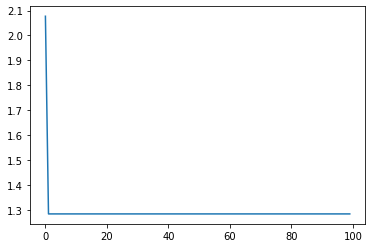

In [77]:
plt.plot(cost_)